In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [41]:
data=pd.read_csv('breast_cancer.csv')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [43]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [44]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [45]:
data = data.drop(['Unnamed: 32', 'id'], axis = 1)

X = data.drop('diagnosis', axis=1)  
y = data['diagnosis']     

# Convert 'diagnosis' column to binary
y = y.replace({'M': 1, 'B': 0})

print("target: \n",y.head(10))

target: 
 0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: diagnosis, dtype: int64


In [46]:
#standardize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [49]:

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [50]:
# Train the model
history = model.fit(X_train, y_train, epochs=90, batch_size=20,validation_data=(X_test, y_test))

Epoch 1/90
20/20 [==============================] - 1s 15ms/step - loss: 0.6645 - accuracy: 0.5980 - val_loss: 0.6210 - val_accuracy: 0.8363
Epoch 2/90
20/20 [==============================] - 0s 8ms/step - loss: 0.5943 - accuracy: 0.8040 - val_loss: 0.5384 - val_accuracy: 0.8947
Epoch 3/90
20/20 [==============================] - 0s 8ms/step - loss: 0.5067 - accuracy: 0.8568 - val_loss: 0.4396 - val_accuracy: 0.9006
Epoch 4/90
20/20 [==============================] - 0s 8ms/step - loss: 0.4162 - accuracy: 0.8719 - val_loss: 0.3477 - val_accuracy: 0.9181
Epoch 5/90
20/20 [==============================] - 0s 8ms/step - loss: 0.3381 - accuracy: 0.8894 - val_loss: 0.2778 - val_accuracy: 0.9240
Epoch 6/90
20/20 [==============================] - 0s 10ms/step - loss: 0.2764 - accuracy: 0.8995 - val_loss: 0.2289 - val_accuracy: 0.9357
Epoch 7/90
20/20 [==============================] - 0s 8ms/step - loss: 0.2413 - accuracy: 0.9020 - val_loss: 0.2028 - val_accuracy: 0.9474
Epoch 8/90
20/20 [

In [54]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Validation Accuracy: {accuracy*100:.2f}%')


6/6 [==============================] - 0s 5ms/step - loss: 0.0546 - accuracy: 0.9766
Validation Accuracy: 97.66%


In [55]:
print("X test:",X_test)
print("y_test:",y_test)

predictions = model.predict(X_test)
rounded_predictions = np.round(predictions, 0)
print(f"Predictions: {rounded_predictions}")


X test: [[0.25978513 0.30064254 0.25775689 ... 0.34879725 0.2856298  0.2129083 ]
 [0.56599934 0.39228948 0.55151683 ... 0.61477663 0.19436231 0.07116621]
 [0.4012968  0.33040243 0.40017967 ... 0.52027491 0.25073921 0.1649613 ]
 ...
 [0.13834067 0.28238079 0.14380485 ... 0.34054983 0.206781   0.4011544 ]
 [0.32367836 0.49983091 0.33542948 ... 0.52268041 0.41119653 0.41492851]
 [0.27966302 0.14879946 0.28443093 ... 0.53642612 0.21170905 0.41164896]]
y_test: 204    0
70     1
131    1
431    0
540    0
      ..
69     0
542    0
176    0
501    1
247    0
Name: diagnosis, Length: 171, dtype: int64
6/6 [==============================] - 0s 3ms/step
Predictions: [[0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.

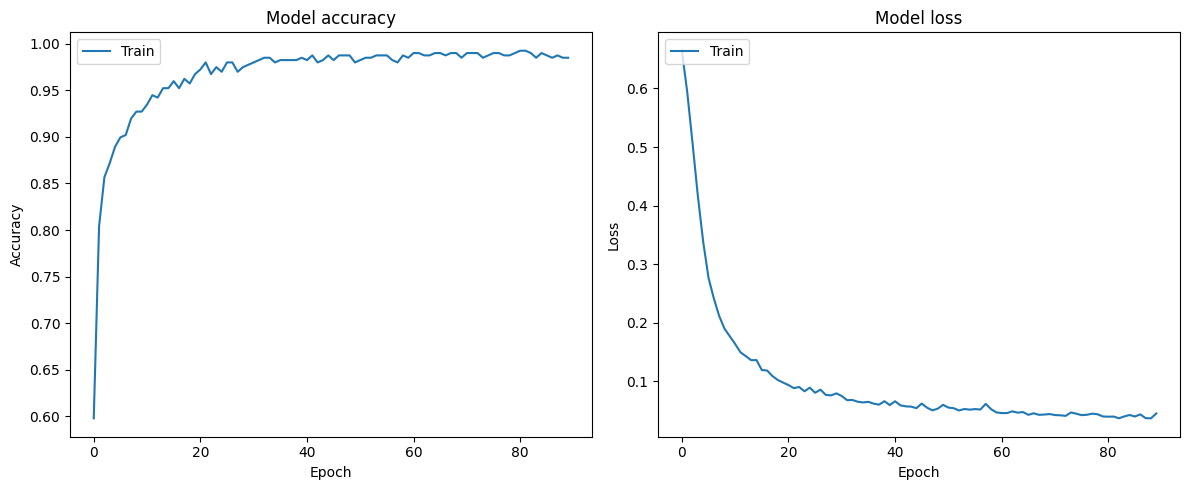

In [56]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
